# IHLT - LABORATORY 5
Armando Rodriguez Ramos and Yara Yousef

## Import the necessary packages

In [1]:
import nltk
nltk.download('wordnet')
nltk.download('wordnet_ic')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package wordnet_ic to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet_ic.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import wordnet_ic
from nltk.corpus import wordnet as wn

brown_ic = wordnet_ic.ic('ic-brown.dat')
sns.set(font_scale=2)

To improve the list of pairs given for the lab we:
1. Remove all the words that are not nouns, verbs, adverbs or adjectives, i.e. the determinants, conjunctions or pronouns.
2. Lower the tags to ensure a good matching generating the wordnet synsets.
3. Create the list of words as well as the list of those words in their (word,tag) pairs.

In [3]:
allPairs = [('the','DT'), ('man','NN'), ('swim','VB'), ('with', 'PR'), 
            ('a', 'DT'), ('girl','NN'), ('and', 'CC'), ('a', 'DT'), ('boy', 'NN'),
            ('whilst', 'PR'), ('the', 'DT'), ('woman', 'NN'), ('walk', 'VB')]
pairs = [(word,tag.lower()) for (word,tag) in allPairs if tag[0] in ['N','V','J','R']]
words = [word for (word,tag) in pairs]
print(pairs)

[('man', 'nn'), ('swim', 'vb'), ('girl', 'nn'), ('boy', 'nn'), ('woman', 'nn'), ('walk', 'vb')]


## Most frequent synsets

In [4]:
mostFrequentSynsets = []
for (word,tag) in pairs:
  mostFrequentSynset = wn.synsets(word,tag[0])[0]
  mostFrequentSynsets.append((word,tag[0],mostFrequentSynset))
  print(word, "\t", mostFrequentSynset)

man 	 Synset('man.n.01')
swim 	 Synset('swim.v.01')
girl 	 Synset('girl.n.01')
boy 	 Synset('male_child.n.01')
woman 	 Synset('woman.n.01')
walk 	 Synset('walk.v.01')


In this section we present the first thing we were asked for: finding the most frequent synset of each world (filtering out the ones that are not Nouns, Verbs, Adverbs, or Adjectives), where a synset of a given word is the set of that word's synonyms.

We can achieve this by using the function "*wn.synsets*" that computes the synsets of a word and retrieves the first element of it, which is the most frequent one. We could check which ones are the most frequent by looking at the lemmas, but since we know that they are ordered by frequency, we can simply retrieve the first one.

We can see that all the words have their own synset except for boy, which is represented in *wordnet* as *male_child*.

## Least common subsumer (LCS)

In [5]:
leastCommonSubsumerMatrix = []
for (_,_,mostFrequentSynset1) in mostFrequentSynsets:
  leastCommonSubsumerRow = []
  for (_,_,mostFrequentSynset2) in mostFrequentSynsets:
    leastCommonSubsumer = mostFrequentSynset1.lowest_common_hypernyms(mostFrequentSynset2)
    
    if len(leastCommonSubsumer) > 0:
      leastCommonSubsumerRow.append(leastCommonSubsumer[0])
    else: leastCommonSubsumerRow.append("")

  leastCommonSubsumerMatrix.append(leastCommonSubsumerRow)

leastCommonSubsumerDF = pd.DataFrame(leastCommonSubsumerMatrix,columns=words,index=words)
leastCommonSubsumerDF

man                   swim                   girl  \
man      Synset('man.n.01')                          Synset('adult.n.01')   
swim                           Synset('swim.v.01')                          
girl   Synset('adult.n.01')                           Synset('girl.n.01')   
boy     Synset('male.n.02')                         Synset('person.n.01')   
woman  Synset('adult.n.01')                          Synset('woman.n.01')   
walk                         Synset('travel.v.01')                          

                             boy                  woman                   walk  
man          Synset('male.n.02')   Synset('adult.n.01')                         
swim                                                     Synset('travel.v.01')  
girl       Synset('person.n.01')   Synset('woman.n.01')                         
boy    Synset('male_child.n.01')  Synset('person.n.01')                         
woman      Synset('person.n.01')   Synset('woman.n.01')                         
walk                                                       Synset('walk.v.01')

Here we show the results of calculating the Least Common Subsumer (LCS), also known as the Lowest Common Hypernym, between each of the synsets. The LCS between two concepts (or synsets) is defined as the most specific third concept that is an ancestor of the first two. In other words, it is their closest shared relational concept.\
For example, we see that the LCS between the two verbs "swim" and "walk", both of which involve a physical act that takes the actor from one location to another, is "travel" (which makes intuitive sense).
\
\
We note that the LCS must be between words of the same tag: verbs can only be matched to verbs, nouns can only be matched to nouns, and so on. We also see that the LCS between two identical synsets is simply the synset itself.
\
\
Another interesting thing to note is that while "boy" is clearly defined and categorized as a male child, "girl" is not likewise defined as female child. Instead, it appears to be categorized as an adult, essentially a synonym for "woman".
We can see this in several cases:

> 1. Where the LCS between "man" and "boy" is "male", the LCS between "woman" and "girl" is not "female" but instead "woman".
2. Where the LCS between "woman" and "boy" is person, the LCS between "man" and "girl" is "adult".
3. Finally, rather than the LCS between "girl" and "boy" being "child" (or something to that effect), it is instead simply "person", a more distant relation than expected but consistent with the seen hierarchy.



## Similarities

First, before starting to compute the similarities, we need a way to normalize the values for the functions requiring so. In our initial checks, we found that the Leacock-Chodorow Similarity is not normalized from 0 to 1. Additionally, we found that this similarity only accepts synset pairs of the same type. Therfore, here we print the maximum possible similarity for each pair of our synset types of interest (nouns, verbs, adverbs, and adjectives).

While we do not manually insert these values into the loop that computes all the similarities (this will be in the next section), we thought it would be interesting to see the values obtained.\
We can see that for nouns and verbs we obtain maximum values on the order of 3.5, whereas for adverbs and adjectives the maximum similarity is quite small, around 0.7. This shows us the importance of normalizing the similarity values computed with this particular metric.

In [6]:
nounSynset = wn.synset('dog.n.01')
maxNounLchSimilarity = round(nounSynset.lch_similarity(nounSynset),2)

verbSynset = wn.synset('swim.v.01')
maxVerbLchSimilarity = round(verbSynset.lch_similarity(verbSynset),2)

adverbSynset = wn.synset('slowly.r.01')
maxAdverbLchSimilarity = round(adverbSynset.lch_similarity(adverbSynset),2)

adjectiveSynset = wn.synset('good.a.01')
maxAdjectiveLchSimilarity = round(adjectiveSynset.lch_similarity(adjectiveSynset),2)

print("Max similarity for nouns:",maxNounLchSimilarity)
print("Max similarity for verbs:",maxVerbLchSimilarity)
print("Max similarity for adverbs:",maxAdverbLchSimilarity)
print("Max similarity for adjectives:",maxAdjectiveLchSimilarity)

Max similarity for nouns: 3.64
Max similarity for verbs: 3.26
Max similarity for adverbs: 0.69
Max similarity for adjectives: 0.69


### Compute and save all similarities among pairs

In this nested for loop, we compute the similarities between all the pairs four different times, each time with a different function: Path, Leacock-Chodorow, Wu-Palmer, and Lin.\
Path and Wu-Palmer similarities allow for comparisons between different synset types, while Leacock-Chodorow and Lin similarities do not. As such, we check the tags of the two synsets before attempting computations with the latter two functions.

As discussed in the previous section, when dealing with the Leacock-Chodorow similarity we compute the maximum similarity value for a tag by comparing the first synset with itself, in order to correctly normalize the values regardless of the synsets' tag.

In [7]:
similarityMatrix, pathMatrix, lchMatrix, wupMatrix, linMatrix = [], [], [], [], []

for (_,tag1,mostFrequentSynset1) in mostFrequentSynsets:
  similarityRow, pathRow, lchRow, wupRow, linRow = [], [], [], [], []

  for (_,tag2,mostFrequentSynset2) in mostFrequentSynsets:
    pathSimilarity = round(mostFrequentSynset1.path_similarity(mostFrequentSynset2),2)
    
    if tag1 == tag2: # Only works when both synsets have same tag
      # Compare first one with itself in order to normalize the similarity
      normalizeValue = mostFrequentSynset1.lch_similarity(mostFrequentSynset1)
      lchSimilarity = round(mostFrequentSynset1.lch_similarity(mostFrequentSynset2)/normalizeValue,2)
    else:
      lchSimilarity = float('nan') # Cannot compare between different tags

    wupSimilarity = round(mostFrequentSynset1.wup_similarity(mostFrequentSynset2),2)

    if tag1 == tag2: # Only works when both synsets have same tag
      linSimilarity = round(mostFrequentSynset1.lin_similarity(mostFrequentSynset2,brown_ic),2)
    else:
      linSimilarity = float('nan') # Cannot compare between different tags

    similarityRow.append((pathSimilarity,lchSimilarity,wupSimilarity,linSimilarity))
    pathRow.append(pathSimilarity); lchRow.append(lchSimilarity)
    wupRow.append(wupSimilarity); linRow.append(linSimilarity)

  similarityMatrix.append(similarityRow)
  pathMatrix.append(pathRow); lchMatrix.append(lchRow)
  wupMatrix.append(wupRow); linMatrix.append(linRow)

similarityDF = pd.DataFrame(similarityMatrix,columns=words,index=words)
pathDF       = pd.DataFrame(pathMatrix,columns=words,index=words)
lchDF        = pd.DataFrame(lchMatrix,columns=words,index=words)
wupDF        = pd.DataFrame(wupMatrix,columns=words,index=words)
linDF        = pd.DataFrame(linMatrix,columns=words,index=words)

### Auxiliary function to plot heatmaps

An auxiliary function to plot heatmaps of a given size to assist in the analysis and conclusions.

In [8]:
def plot_heatmap(dataframe, title):
  fig, ax = plt.subplots(figsize=(13,10))
  plt.title(title)
  sns.heatmap(dataframe, annot=True, cmap="YlGnBu", square=True, 
              vmin=0, vmax=1, annot_kws={"fontsize":16})
  plt.show()

## Analysis and conclusions

In this final section, we explain and analyze the results to conclude which similarity performs best.

### General overview

In [9]:
similarityDF

man                      swim  \
man        (1.0, 1.0, 1.0, 1.0)     (0.1, nan, 0.18, nan)   
swim      (0.1, nan, 0.18, nan)      (1.0, 1.0, 1.0, 1.0)   
girl   (0.25, 0.62, 0.63, 0.71)    (0.09, nan, 0.17, nan)   
boy     (0.33, 0.7, 0.67, 0.73)     (0.1, nan, 0.18, nan)   
woman   (0.33, 0.7, 0.67, 0.79)     (0.1, nan, 0.18, nan)   
walk      (0.1, nan, 0.18, nan)  (0.33, 0.66, 0.33, 0.49)   

                           girl                       boy  \
man    (0.25, 0.62, 0.63, 0.71)   (0.33, 0.7, 0.67, 0.73)   
swim     (0.09, nan, 0.17, nan)     (0.1, nan, 0.18, nan)   
girl       (1.0, 1.0, 1.0, 1.0)  (0.17, 0.51, 0.63, 0.29)   
boy    (0.17, 0.51, 0.63, 0.29)      (1.0, 1.0, 1.0, 1.0)   
woman   (0.5, 0.81, 0.95, 0.91)   (0.2, 0.56, 0.67, 0.32)   
walk     (0.09, nan, 0.17, nan)     (0.1, nan, 0.18, nan)   

                         woman                      walk  
man    (0.33, 0.7, 0.67, 0.79)     (0.1, nan, 0.18, nan)  
swim     (0.1, nan, 0.18, nan)  (0.33, 0.66, 0.33, 0.49)  
girl   (0.5, 0.81, 0.63, 0.91)    (0.09, nan, 0.17, nan)  
boy    (0.2, 0.56, 0.67, 0.32)     (0.1, nan, 0.18, nan)  
woman     (1.0, 1.0, 1.0, 1.0)     (0.1, nan, 0.18, nan)  
walk     (0.1, nan, 0.18, nan)      (1.0, 1.0, 1.0, 1.0)

Above, we represent the results of the computations as a matrix of similarities between all six synsets. The values in each set of results correspond to each function in the order they were computed: Path, Leacock-Chodorow, Wu-Palmer, and Lin.

As expected, we see that the values for all four functions are the maximum value 1.0 when the synset is compared with itself. This is a good sanity check both for our implementation of the similarity computations and for the normalization of the Leacock-Chodorow values.

An interesting observation is that the range of results between the four different functions is larger for noun-tagged words than it is for verb-tagged words. Between verbs, the values range from 0.33 to 0.66 for the same comparison. Between nouns, the values can range from around 0.2 to 0.7, or 0.3 to 0.8, for the same comparison. This seems to imply there is less agreement between the four approaches for noun similarity than for verb similarity.
While it should be kept in mind that for this example we only have two verb-tagged words, which means the results may not actually be so general with a larger dataset, it is interesting to note nonetheless.
\
\
As we continue the analysis in the following subsections, we will be trying to determine which of the four functions we tested yields the best results. We can measure this by arguing that the best similarity will be the one that consistently relates:
1. "woman and girl" in a similar way to "man and boy".
2. "woman and man" in a similar way to "girl and boy".
3. "woman and boy" in a similar way to "man and girl".
4. "woman and man" as *more closely related* than "woman and boy", and "man and woman" as *more closely related* than "man and girl".
6. "walk and swim" with a similarity value greater than the similarity values between a noun and a verb.

### Path similarity


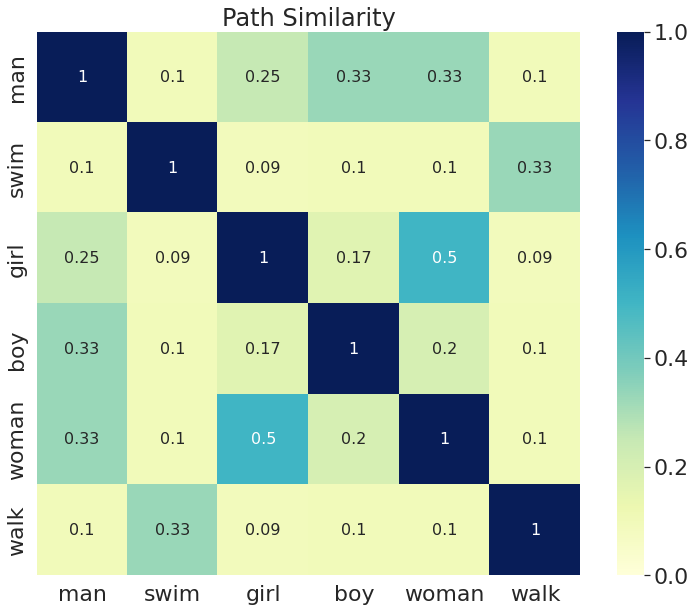

In [10]:
plot_heatmap(pathDF,"Path Similarity")

The path similarity can compare between each pair regardless of their types. We can check that, obviously, all the diagonals are 1 or 100%, which makes sense.

For the first objective, we can see that girl and woman have the maximum similarity (excluding the diagonal), which is 0.5. Nevertheless, man and boy have a similarity of 0.33. It's not a bad result. Let's see the other objectives.

For the second objective, we can see that woman-man have a similarity of 0.33, while girl and boy have only about half that. It's not really consistent with this objective.

For the third one, we are achieving good results as long as girl-man has 0.25 and boy-woman has 0.2. 

However, on the fourth objective, we can see that for man, the comparison using woman or girl results in the same similarity, which seems strange as a woman is intuitivly more related to a man than a girl should be.

The two verbs are related by 0.33, which looks okay considering that no more than 0.5 is seen in the matrix (excluding the diagonal).

To conclude, it's not the best similarity because it has some problems differentiating between girl and woman (which are similarly related to man) and the fact that boy is more related to a woman than it is to a girl.


### Leacock-Chodorow Similarity

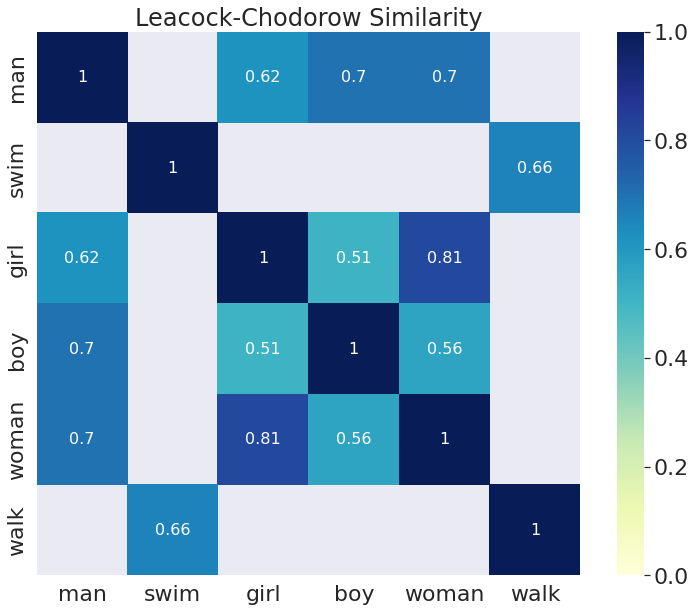

In [11]:
plot_heatmap(lchDF,"Leacock-Chodorow Similarity")

First, we note that the Leacock-Chodorow Similarity is a symmetric function, which is a good preliminary check.

For the first of the aforementioned comparison checks, we see that the similarity value between woman and girl is 0.81, while the value between man and boy is 0.7.

For the second, the similarity value between woman and man is 0.7, while the value between girl and boy is 0.51.

For the third, the similarity value between woman and boy is 0.56, while the value between man and girl is 0.62. 

For the fourth, we see that woman and man have a similarity value of 0.7, which is more related than woman and boy, which have a similarity value of 0.56. Meanwhile, the similarity between man and woman (which due to the symmetry of the function is still 0.7) is also higher than the similarity between man and girl, which is 0.62.

The fifth test is not applicable here since Leacock-Chodorow cannot compare between two different word types. We do however note that the similarity value between our two verbs "walk and swim" is 0.66, which is the highest value for this pair amongst all four functions, even when taking into account the overall ranges in values of each.\
Other than the values of 1.0 for the self-comparisons, the highest value in this matrix is 0.81 (girl and woman): there is only a difference of 0.15 between that and the verb comparison.
\
\
Overall:\
This function passes our checks quite well overall. It finds reasonably similar values for "woman and girl" and "man and boy". While there is a larger difference in the similarity values between "woman and man" and "girl and boy", this is still acceptable.

It finds very close values for "woman and boy" and "man and girl", and passes both parts of the fourth check, finding that "woman and man" are more closely related than "woman and boy", and that "man and woman" are more similar than "man and girl".

It also finds "swim and walk" to be more closely related than the other functions do.

### Wu-Palmer Similarity

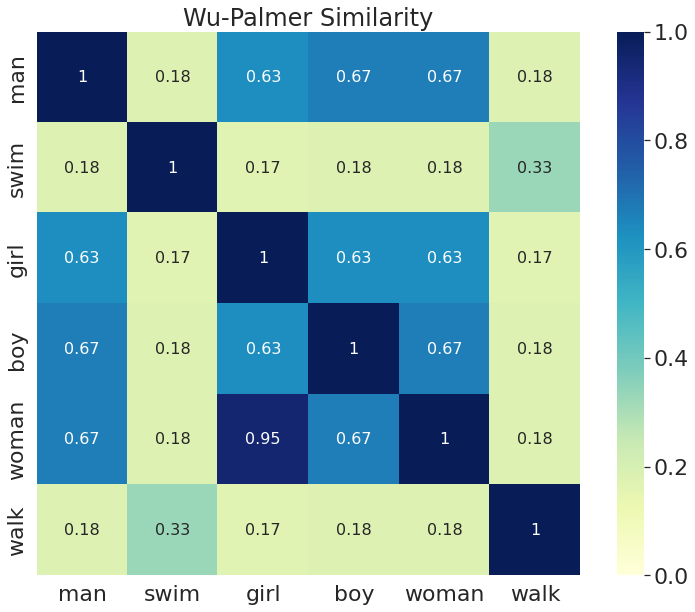

In [12]:
plot_heatmap(wupDF,"Wu-Palmer Similarity")

We can see that wu-palmer similarity can perform the similarity check between each pair independently of their type, in the same way as path similarity. We can check that, obviously, all the diagonals are 1 or 100%, which makes sense.

The first thing to notice, which is quite strange, is that woman with girl have a different similarity than girl with woman. This is because wu-palmer is not necessarily a symmetric similarity.

For the first objective, we can see that girl and woman have the maximum similarity (excluding the diagonal), which is 0.95 (or 0.63), and man and boy also have a large similarity of 0.67. It's not a bad result. Let's see the other objectives.

For the second objective, we can see that woman-man have a similarity of 0.67, while girl and boy have 0.63. Considering those pairs with a similar similarity are really good results.

For the third one, we are not achieving good results as long as girl-man and boy-woman are found to have a lot of similarity. It is fine for the value of similarity among them because they're similar relations, but a value of 0.67 is too high for either of these pairs. 

However, on the fourth objective, we can see that something is happening because man shares many similarities with girl, boy, and woman, and woman shares many similarities with boy, girl, and man. Overall, the similarities among all the pairs are really high, and only small differences can be found.

The two verbs are related by 0.33, equally as the path similarity, which looks okay considering that no more than 0.5 is seen in the matrix (excluding the diagonal). Also, the similarity among verbs and nouns is really small compared with noun to noun or verb to verb similarity.

To conclude, we think it's not the best similarity because it has many problems while considering really high values for all the pairs presented, which didn't help in checking its correctness. However, it is not a bad metric and we will see the overall conclusion at the end of the document comparing all of them.

### Lin Similarity

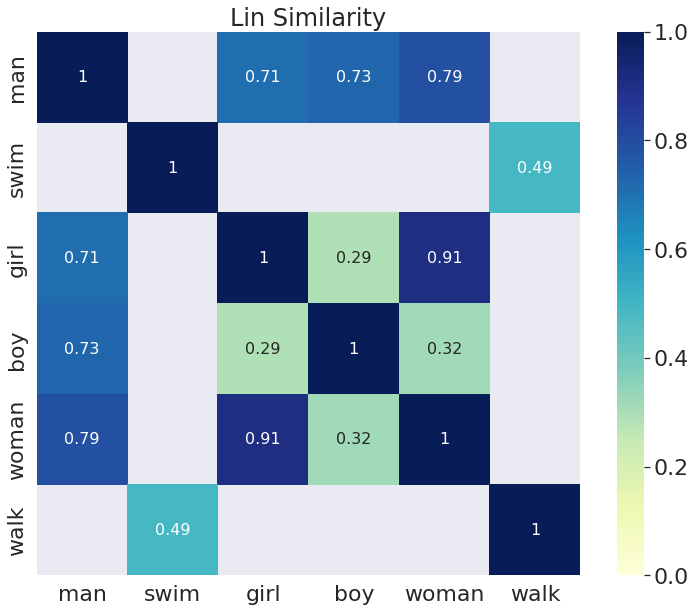

In [13]:
plot_heatmap(linDF,"Lin Similarity")

First, we note that the Lin Similarity is also a symmetric function.

For the first comparison check, we see that the similarity value between woman and girl is 0.91, while the value between man and boy is 0.73.

For the second, the similarity value between woman and man is 0.79, while the value between girl and boy is only 0.29.

For the third, the similarity value between woman and boy is only 0.32, while the value between man and girl is 0.71.

For the fourth, we note that the similarity values between woman and man (0.79), is much more related than woman and boy, which have a similarity value of 0.32. Meanwhile, the similarity between man and woman (0.79) is higher than the similarity between man and girl (0.71) but not by very much.

The fifth test is not applicable here since, like the Leacock-Chodorow function, the Lin similarity cannot compare between two different word types. But we note that Lin finds the similarity between "walk and swim" to be higher than the Wu-Palmer and Path functions do, even when taking into account the ranges of values (setting the maximum 1.0 aside).
\
\
Overall:\
While the Lin Similarity does reasonably well overall for our checks, it does not do well for the second or third: it finds a large difference in the similarities between "woman and man" and "girl and boy", and also between "woman and boy" and "man and girl". It finds that girl is much less simialar to boy and much more similar to man.

It also only barely passes the second part of the fourth check, not finding a huge difference in comparing "man and woman" and "man and girl".

Finally, it considers "woman and girl" to be signifcantly more similar than "man and boy".

### Final conclusions

To conclude, we note that all the similarities have their own grading with positive and negative aspects as discussed in their respective explanations. Nevertheless, there is a particular one that accomplishes, more or less satisfactorily, all the described objectives: the Leacock-Chodorow similarity. It seems overall to be the function that best represents the similarities amongst the pairs we are dealing with.

It has to be mentioned that this comparison was performed using a reduced number of words. It's quite evident that, depending on the semantics of the situation, we will obtain a different result.

For this reason, we cautiously conclude that the Leacock-Chodorow similarity has the best performance of these four fuctions, but keeping in mind that another set of words may have led us to a different conclusion.